# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [8]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [12]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [13]:
# add a column of 1s to the front of the X matrix
X = np.stack((np.ones(num_examples), X), axis=1)
print(X.shape)

X[:5]

(70, 2)


array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)


Shape of X_train: (56, 2)
Shape of X_test: (14, 2)
Shape of Y_train: (56,)
Shape of Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

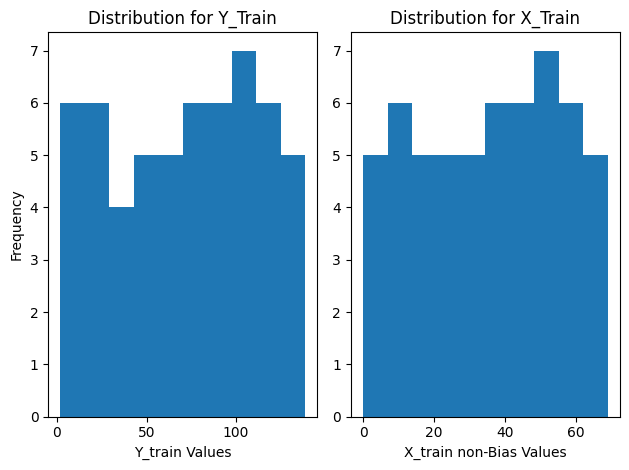

In [6]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].hist(Y_train)
axs[0].set_title('Distribution for Y_Train')
axs[0].set_xlabel('Y_train Values')
axs[0].set_ylabel('Frequency')
# plot just the 2nd column/non-1s column for X
axs[1].hist(X_train[:,1])
axs[1].set_title('Distribution for X_Train')
axs[1].set_xlabel('X_train non-Bias Values')

plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [7]:
M1 = np.array([5, 1])
M2 = np.array([1, 2])

M1_hat_train = np.dot(X_train, M1)
M2_hat_train = np.dot(X_train, M2)

print('Shape of M1_hat_train:', M1_hat_train.shape)
print('Shape of M2_hat_train:', M2_hat_train.shape)


Shape of M1_hat_train: (56,)
Shape of M2_hat_train: (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [8]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
    """Apply the gradient descent algorithm to learn learn linear regression.
    
    Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.
    
    Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
    """
    # m = number of examples, n = number of features
    m, n = inputs.shape
    
    # We'll use a vector of size n to store the learned weights and initialize
    # all weights to 1. 
    W = np.ones(n)
    
    # Keep track of the training loss and weights after each step.
    losses = []
    weights = []
    
    for epoch in range(num_epochs):
        # Append the old weights to the weights list to keep track of them.
        weights.append(W)
        
        # Evaluate the current predictions for the training examples given
        # the current estimate of W (you did this in exercise 5). 
        predictions = np.dot(inputs, W)

        # Find the difference between the predictions and the actual target
        # values.
        diff = predictions - outputs
        
        # In standard linear regression, we want to minimize the sum of squared
        # differences. Compute the mean squared error loss. Don't bother with the
        # 1/2 scaling factor here.
        loss = (diff ** 2).sum() / m
        
        # Append the loss to the losses list to keep a track of it.
        losses.append(loss)
        
        # Compute the gradient with respect to the loss.
        # [Formula (4) in the Gradient Descent Implementation]
        gradient = np.dot(diff, inputs) / m
        
        # Update weights, scaling the gradient by the learning rate.
        W = W - learning_rate * gradient
    

    return np.array(weights), np.array(losses)

--------------------------------------------------
Epoch #1 of 5
Weights = [1. 1.]
Loss = 1665.37
--------------------------------------------------
Epoch #2 of 5
Weights = [1.00709394 1.33262886]
Loss = 742.41
--------------------------------------------------
Epoch #3 of 5
Weights = [1.01183193 1.55469157]
Loss = 331.07
--------------------------------------------------
Epoch #4 of 5
Weights = [1.01499708 1.7029404 ]
Loss = 147.73
--------------------------------------------------
Epoch #5 of 5
Weights = [1.01711221 1.80191116]
Loss = 66.02


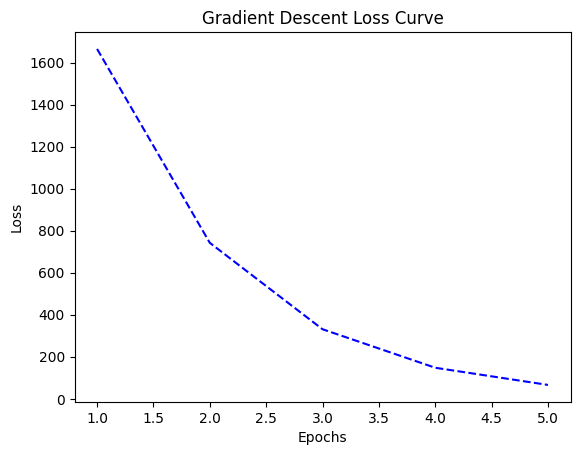

In [9]:
gd_results = gradient_descent(X_train, Y_train, learning_rate=.0002, num_epochs=5)

num_epochs = len(gd_results[0]) + 1
weights = gd_results[0]
loss = gd_results[1]

for epoch in range(1, num_epochs):
    print('-'*50)
    print(f'Epoch #{epoch} of {num_epochs - 1}')
    print(f'Weights = {weights[epoch - 1]}')
    print(f'Loss = {loss[epoch - 1]:.2f}')

plt.plot(range(1, num_epochs), loss, 'b--')
plt.title('Gradient Descent Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

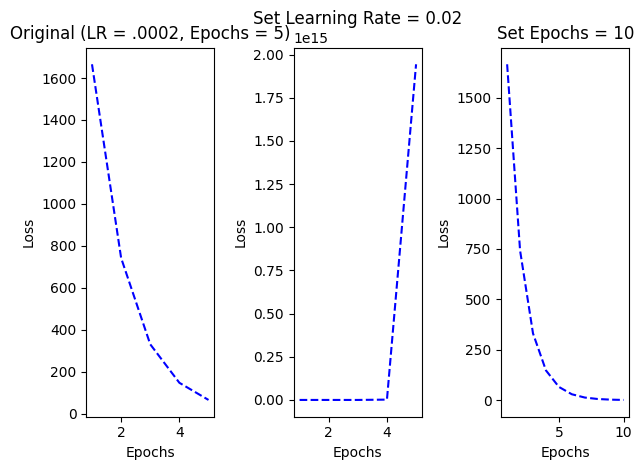

--------------------------------------------------
Scenario: Original (LR = .0002, Epochs = 5)
Final loss amount =  66.02
--------------------------------------------------
Scenario: Set Learning Rate = 0.02
Final loss amount =  1943544404976517.25
--------------------------------------------------
Scenario: Set Epochs = 10
Final loss amount =  1.48


In [10]:
# 1. No - a learning rate of 0.02 is too high for this problem and results
# in a loss that incrases with every epoch. The steps are too large and the
# descent is bouncing over the desired point

# 2. Yes - we could consider increasing the number of epochs to see if we can
# improve our model, however we should set ourselves a baseline ahead of time 
# to see if we have accomplished a better prediction than expected. We also 
# want to make sure that we do not begin to overfit.

# create a list of dictionaries with the details for each scenario
gd_runs = [
    {'title': 'Original (LR = .0002, Epochs = 5)', 'learning_rate': .0002, 'num_epochs': 5},
    {'title': 'Set Learning Rate = 0.02', 'learning_rate': .02, 'num_epochs': 5},
    {'title': 'Set Epochs = 10', 'learning_rate': .0002, 'num_epochs': 10},
    ]

# create an empty list to hold the results of each scenario
gd_run_results = []

# loop through scenarios and run gradient descent
for gd_run in gd_runs:
    gd_run_results.append(gradient_descent(X_train, 
                                           Y_train, 
                                           learning_rate=gd_run['learning_rate'], 
                                           num_epochs=gd_run['num_epochs']))

# create a side-by-side plot of the scenarios
fig, axs = plt.subplots(1, 3, tight_layout=True)

# loop through the scnarios and create a plot
for i in range(len(gd_runs)):
    axs[i].plot(range(1, len(gd_run_results[i][0]) + 1), gd_run_results[i][1], 'b--')
    axs[i].set_title(gd_runs[i]['title'])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')

plt.show()

# loop through the scnarios and print final loss
for i in range(len(gd_runs)):
    print('-'*50)
    print(f'Scenario: {gd_runs[i]["title"]}')
    last_epoch = len(gd_run_results[i][1])
    print(f'Final loss amount = {gd_run_results[i][1][last_epoch - 1]: .2f}')

### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [11]:
# Get the weights for the model that uses 10 Epochs and .0002 learning rate
scenario_num = 2 # using 0 as the first index
last_epoch = len(gd_run_results[scenario_num][1])

M3 = gd_run_results[scenario_num][0][last_epoch - 1]
print(f'M3(x) = {M3[0]} + {M3[1]}*x')


M3(x) = 1.0208172733581025 + 1.9743255331721494*x


---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [12]:
# Get results of M3 on X_train data
M3_hat_train = np.dot(X_train, M3)

# Get MSEs for each of the models
mse_train_M1 = mean_squared_error(Y_train, M1_hat_train)
mse_train_M2 = mean_squared_error(Y_train, M2_hat_train)
mse_train_M3 = mean_squared_error(Y_train, M3_hat_train)

print(f'MSE for training data on M1 = {mse_train_M1:.2f}')
print(f'MSE for training data on M2 = {mse_train_M2:.2f}')
print(f'MSE for training data on M3 = {mse_train_M3:.2f}')


MSE for training data on M1 = 1397.61
MSE for training data on M2 = 0.33
MSE for training data on M3 = 1.48


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [13]:
# Get results of models on X_test data
M1_hat_test = np.dot(X_test, M1)
M2_hat_test = np.dot(X_test, M2)
M3_hat_test = np.dot(X_test, M3)

# Get MSEs for each of the models
mse_test_M1 = mean_squared_error(Y_test, M1_hat_test)
mse_test_M2 = mean_squared_error(Y_test, M2_hat_test)
mse_test_M3 = mean_squared_error(Y_test, M3_hat_test)

print(f'MSE for test data on M1 = {mse_test_M1:.2f}')
print(f'MSE for test data on M2 = {mse_test_M2:.2f}')
print(f'MSE for test data on M3 = {mse_test_M3:.2f}')

# M2 generalizes better than the other models, as it has the lowest MSE on the test data

MSE for test data on M1 = 1113.60
MSE for test data on M2 = 0.29
MSE for test data on M3 = 1.07


----
#### <span style="color:chocolate">Bonus question</span> (20 points)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [14]:
# 1. Stochastic gradient descent (SGD) differs from gradient descent (GD) by splitting
# the dataset into batches. The gradient is calculated for each batch, and once all the
# batches are used then you have completed one epoch. For our implementation to become SGD
# we must split the input data set and run the gradient descent on each batch within each epoch


--------------------------------------------------
Epoch #1 of 5
Final Weights Used = [1.01245284 1.5656384 ]
Loss = 313.56
--------------------------------------------------
Epoch #2 of 5
Final Weights Used = [1.01914082 1.88340808]
Loss = 18.35
--------------------------------------------------
Epoch #3 of 5
Final Weights Used = [1.02090645 1.96222116]
Loss = 3.13
--------------------------------------------------
Epoch #4 of 5
Final Weights Used = [1.02146667 1.98795121]
Loss = 0.71
--------------------------------------------------
Epoch #5 of 5
Final Weights Used = [1.0216818  1.99652323]
Loss = 0.36
--------------------------------------------------
Final model from SGD = 1.0216817955963517 + 1.996523232939697*x


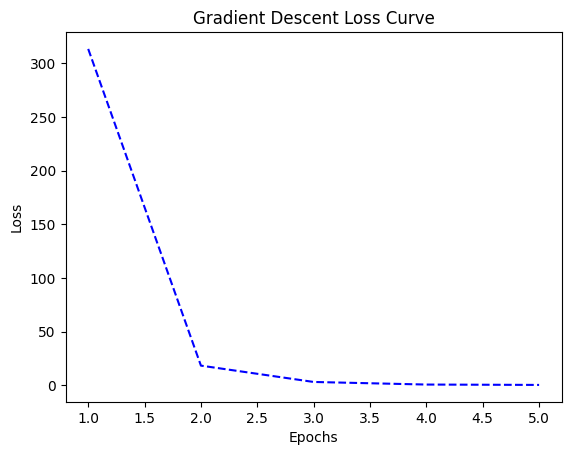

In [15]:
def stochastic_gradient_descent(inputs, outputs, learning_rate, num_epochs, batch_size=1):
    """Apply the stochastic gradient descent algorithm to learn learn linear regression.
    
    Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.
    batch_size: default is 1; The number of batches to be used
    
    Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
    """
    # m = number of examples, n = number of features
    m, n = inputs.shape
    
    # We'll use a vector of size n to store the learned weights and initialize
    # all weights to 1. 
    W = np.ones(n)
    
    # Keep track of the training loss and weights after each step.
    losses = []
    weights = []

    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    for epoch in range(num_epochs):
        # combine the X and Y data and shuffle before creating batches
        temp_data_yx = np.c_[outputs, inputs]
        np.random.shuffle(temp_data_yx)

        # break data into batches and run gradient on each batch
        for batch_start in range(0, m, batch_size):
            # Capture the weights to be used in current batch
            W_used = W
            batch_stop = batch_start + batch_size
            batch_x = temp_data_yx[batch_start:batch_stop, 1:]
            batch_y = temp_data_yx[batch_start:batch_stop, :1].flatten()

            curr_batch_size = len(batch_y)
        
            # Evaluate the current predictions for the training examples given
            # the current estimate of W (you did this in exercise 5). 
            predictions = np.dot(batch_x, W)
    
            # Find the difference between the predictions and the actual target
            # values.
            diff = predictions - batch_y
            
            # In standard linear regression, we want to minimize the sum of squared
            # differences. Compute the mean squared error loss. Don't bother with the
            # 1/2 scaling factor here.
            loss = (diff ** 2).sum() / curr_batch_size
            
            # Compute the gradient with respect to the loss.
            # [Formula (4) in the Gradient Descent Implementation]
            gradient = np.dot(diff, batch_x) / curr_batch_size
            
            # Update weights, scaling the gradient by the learning rate.
            W = W - learning_rate * gradient

        # Append the final weights used from current epoch to the weights list to keep track of them.
        weights.append(W_used)
        
        # Append the final loss form current epoch to the losses list to keep a track of it.
        losses.append(loss)

    return np.array(weights), np.array(losses)

# run the stochastic gradient descent
sgd_run = stochastic_gradient_descent(X_train, Y_train, learning_rate=.0002, num_epochs=5, batch_size=20)

# get the weights, losses, and epoch count
num_epochs = len(sgd_run[1]) + 1
weights = sgd_run[0]
loss = sgd_run[1]

# Loop through the epochs and print the weights and losses
for epoch in range(1, num_epochs):
    print('-'*50)
    print(f'Epoch #{epoch} of {num_epochs - 1}')
    print(f'Final Weights Used = {weights[epoch]}')
    print(f'Loss = {loss[epoch - 1]:.2f}')

# print the final model
print('-'*50)
print(f'Final model from SGD = {weights[num_epochs - 1][0]} + {weights[num_epochs - 1][1]}*x')

# plot the loss curve from the SGD
plt.plot(range(1, num_epochs), loss, 'b--')
plt.title('Gradient Descent Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# The SGD converges much quicker than the standard GD because the batches allow the algorithm to
# run many more iterations of the gradient descent even if it is using a small subsection of the 
# dataset